In [5]:
!unzip /content/car-evaluation-data-set.zip

Archive:  /content/car-evaluation-data-set.zip
  inflating: car_evaluation.csv      


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/car_evaluation.csv')

In [29]:
data=data.rename(columns={'vhigh': 'buying price','vhigh.1': 'maintenance cost','2': 'number of doors','2.1': 'number of persons','small': 'lug_boot','low': 'safety','unacc':'decision'})



In [30]:
label_encoder = LabelEncoder()

# Encode categorical variables
data['buying price'] = label_encoder.fit_transform(data['buying price'])
data['maintenance cost'] = label_encoder.fit_transform(data['maintenance cost'])
data['number of doors'] = label_encoder.fit_transform(data['number of doors'])
data['number of persons'] = label_encoder.fit_transform(data['number of persons'])
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])
data['safety'] = label_encoder.fit_transform(data['safety'])
data['decision'] = label_encoder.fit_transform(data['decision'])

In [31]:
X = data.drop('decision', axis=1)
y = data['decision']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



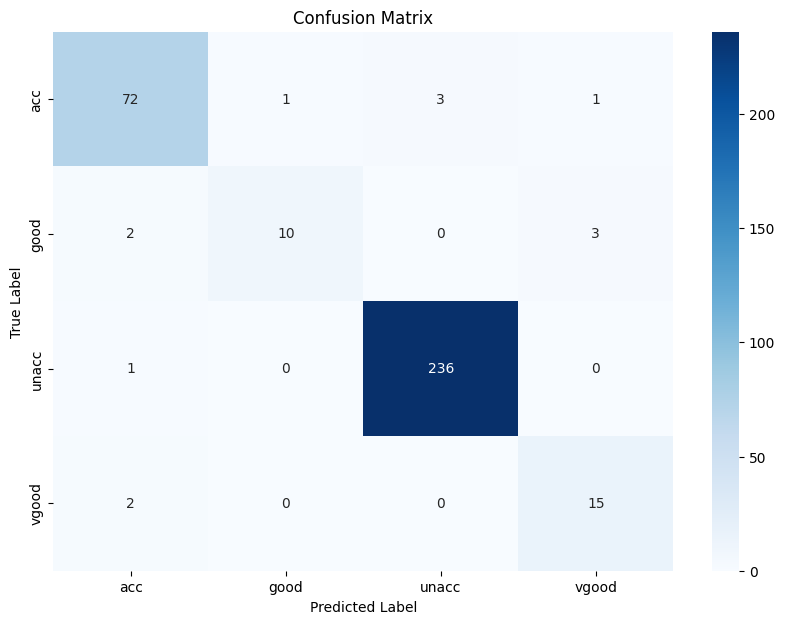

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()